<a href="https://colab.research.google.com/github/Pankajjoshi11/neural_network_creation/blob/main/improved_accuracy_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(training_data, training_labels),(testing_data,testing_labels)=mnist.load_data()

training_data=training_data/255.0
testing_data = testing_data /255.0

#ideally have 3-5 layers not more than that cause it will cause overfitting, although you can change the number of epochs later for more propogation
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        128,
        activation='relu'
    ),
    #relu= rectified linear function
    #adding a layer to improve accuracy
    tf.keras.layers.Dense(
        64,
        activation='relu'
    ),
    tf.keras.layers.Dense(
        32,
        activation='relu'
    ),
    tf.keras.layers.Dense(
        10,
        activation= 'softmax'
    )
    #softmax = gives probability of the each number represented and the highest probability one wil be selected
])


model.compile(
    optimizer= 'sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

my_model=model.fit(
    training_data,
    training_labels,
    epochs=10
)
my_model
#ideal accuracy is up to 97-98 percent

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6524 - loss: 1.1620
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9159 - loss: 0.2939
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9363 - loss: 0.2188
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9497 - loss: 0.1772
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9572 - loss: 0.1503
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9608 - loss: 0.1356
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9651 - loss: 0.1189
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9701 - loss: 0.1050
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9724 - loss: 0.0955
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9763 - loss: 0.0832


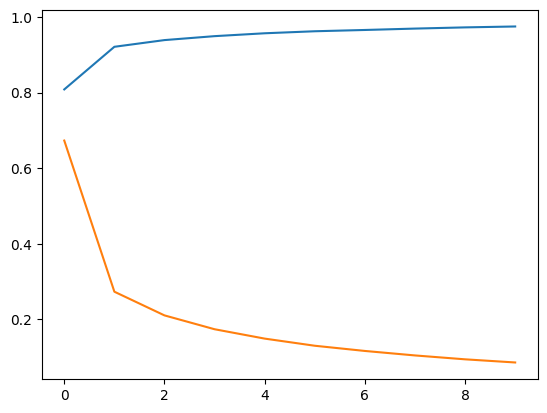

In [2]:
import matplotlib.pyplot as plt

accuracy=my_model.history['accuracy']
loss=my_model.history['loss']

epochs=range(len(accuracy))

plt.plot(epochs,accuracy)
plt.plot(epochs,loss)
plt.show()

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (32, 784)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 128)                   │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 64)                    │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 32)                    │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 10)                    │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,148 (434.18 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [4]:
model.evaluate(testing_data,testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9658 - loss: 0.1156


[0.09774971008300781, 0.970300018787384]

In [6]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

uploaded_image=files.upload()
for path in uploaded_image.keys():
  path=path
  input_image=image.load_img(path,color_mode='grayscale',target_size=(28,28))
  numerical_value_og_img=image.img_to_array(input_image)

  expand_dimension=numerical_value_og_img.reshape(-1,28,28)
  predicted_value=model.predict(expand_dimension)
  predicted_value=np.argmax(predicted_value)
  print(predicted_value)



Saving grish mama new.jpg to grish mama new.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
